C:\Users\muthu\AppData\Local\Temp\ipykernel_18976\1810600784.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('all.csv.zip', index_col=0, parse_dates=True)


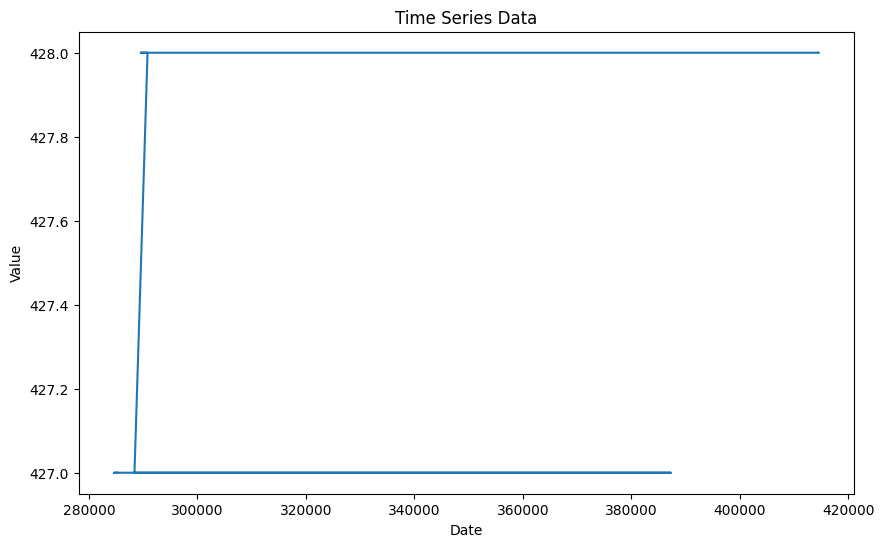

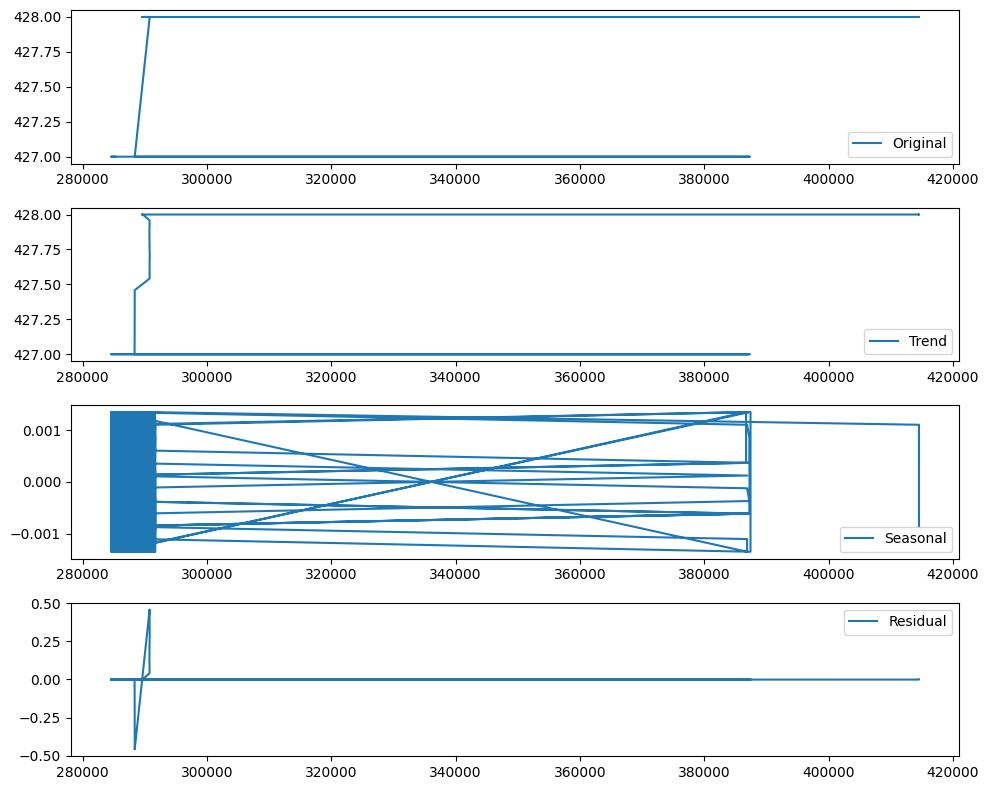

ADF Statistic: -0.8260996355593494
p-value: 0.8113350349082926
Critical Values: {'1%': -3.431955748232467, '5%': -2.8622495316391747, '10%': -2.5671476906319395}


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Load time series data
data = pd.read_csv('all.csv.zip', index_col=0, parse_dates=True)

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data[data.columns[0]])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Decompose the time series data
decomposition = seasonal_decompose(data[data.columns[0]], model='additive', period=12)  # Assuming a seasonal period of 12 months
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(data[data.columns[0]], label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

# Check for stationarity using Augmented Dickey-Fuller test
adf_result = adfuller(data[data.columns[0]])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:', adf_result[4])
